##Load Libraries

In [202]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Read Data

In [224]:
data = pd.read_csv('/content/drive/MyDrive/Project/water_potability.csv')

In [225]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [227]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [228]:
data.shape

(3276, 10)

In [229]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [230]:
data.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


## Clean Data

In [231]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [232]:
data.fillna(data.median(), inplace=True)

In [233]:
data.drop_duplicates(inplace=True)
data.shape

(3276, 10)

In [234]:
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Outlier Removal

In [235]:
features = ["ph", "Hardness", "Solids", "Chloramines", "Organic_carbon", "Trihalomethanes", "Turbidity"]
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data[~((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [236]:
data_cleaned.shape

(2890, 10)

### Box plot before removing outliers

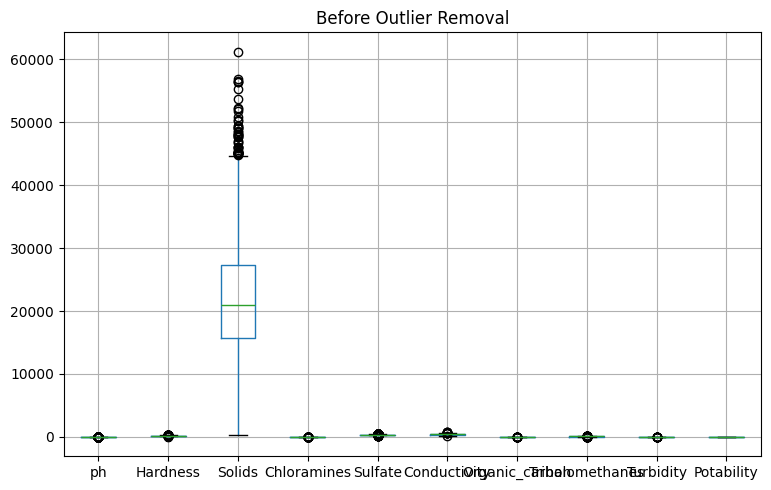

In [237]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
data.boxplot()
plt.title("Before Outlier Removal")

plt.tight_layout()
plt.show()

### Box plot after removing outliers

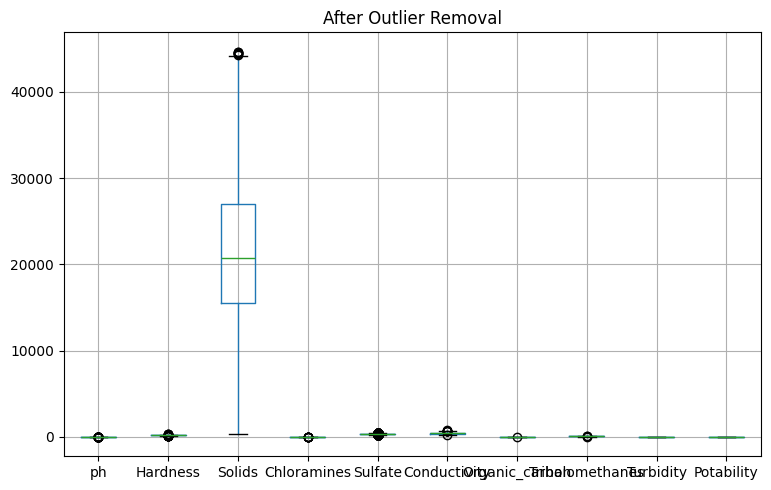

In [238]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
data_cleaned.boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

## Standardization

In [239]:
x = data_cleaned.drop("Potability", axis=1)
y = data_cleaned['Potability']

In [242]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
x_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.016006,0.277397,-0.099622,0.126131,0.989660,1.709737,-1.224968,1.383171,-1.318940
2,0.854649,0.939112,-0.208128,1.495576,-0.020983,-0.089299,0.796590,-0.004132,-1.196930
3,1.033015,0.601757,0.051377,0.652318,0.658026,-0.772597,1.285055,2.283545,0.871010
4,1.668532,-0.536293,-0.445689,-0.396238,-0.675047,-0.338658,-0.857815,-2.325565,0.143021
5,-1.206521,-0.289617,0.879561,0.295716,-0.203339,-1.794938,-1.841838,-0.779845,-1.849359


Text(0.5, 1.0, 'Scaled Numerical Features')

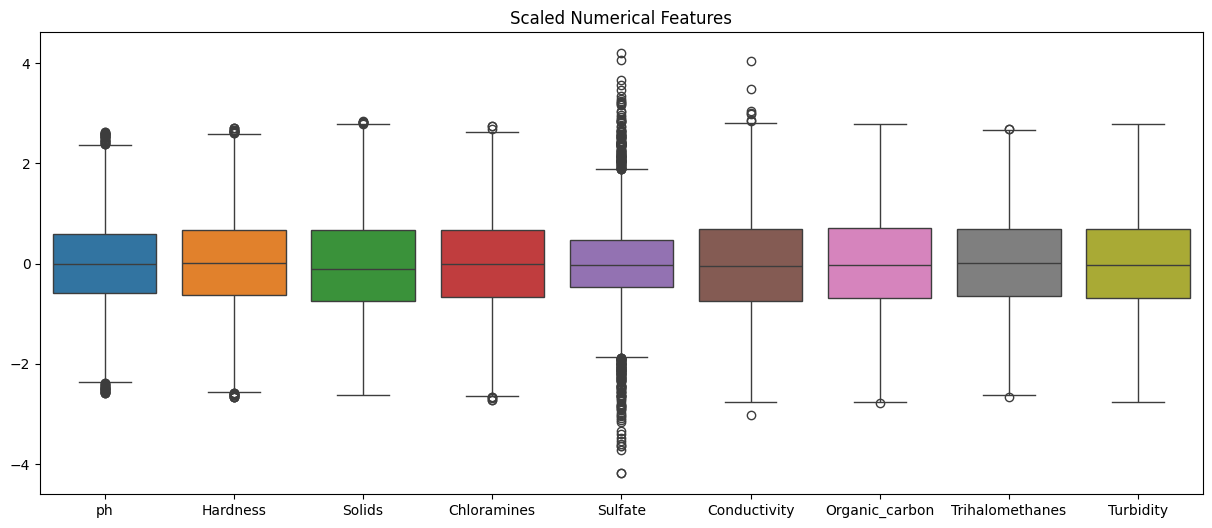

In [243]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=x_scaled)
plt.title('Scaled Numerical Features')

## Balance Data

Text(0.5, 0, 'Conterfeit')

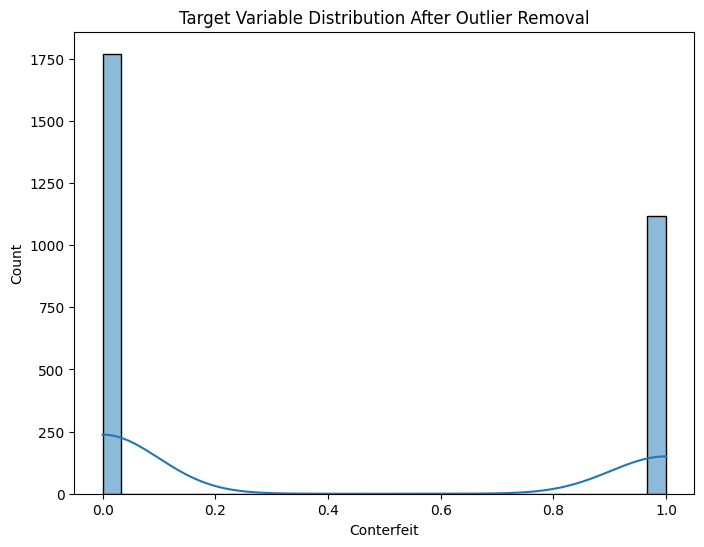

In [244]:
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Target Variable Distribution After Outlier Removal')
plt.xlabel('Conterfeit')

### Resample

In [245]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

In [246]:
data_resampled = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=['Potability'])], axis=1)
data_resampled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.016006,0.277397,-0.099622,0.126131,0.989660,1.709737,-1.224968,1.383171,-1.318940,0
1,0.854649,0.939112,-0.208128,1.495576,-0.020983,-0.089299,0.796590,-0.004132,-1.196930,0
2,1.033015,0.601757,0.051377,0.652318,0.658026,-0.772597,1.285055,2.283545,0.871010,0
3,1.668532,-0.536293,-0.445689,-0.396238,-0.675047,-0.338658,-0.857815,-2.325565,0.143021,0
4,-1.206521,-0.289617,0.879561,0.295716,-0.203339,-1.794938,-1.841838,-0.779845,-1.849359,0


In [247]:
x = data_resampled.drop("Potability", axis=1)
y = data_resampled['Potability']

Text(0.5, 0, 'Conterfeit')

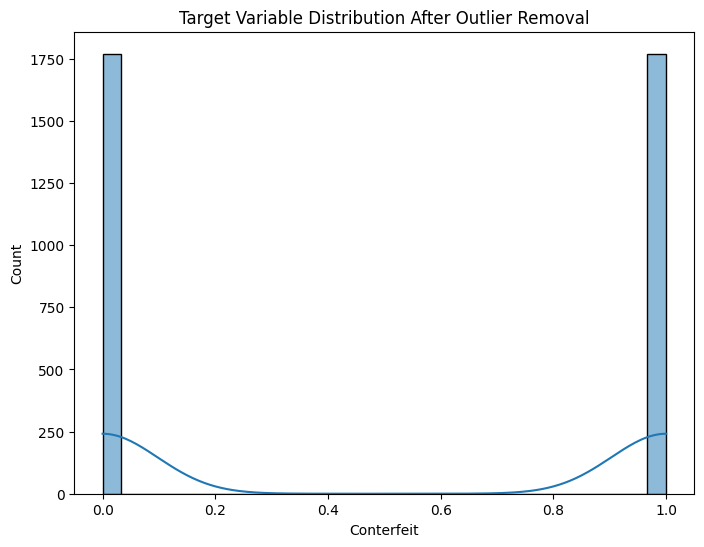

In [248]:
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Target Variable Distribution After Outlier Removal')
plt.xlabel('Conterfeit')

## Split Data

In [249]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Classification

In [250]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

##Evaluation

In [251]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7320169252468265
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       350
           1       0.76      0.69      0.72       359

    accuracy                           0.73       709
   macro avg       0.73      0.73      0.73       709
weighted avg       0.73      0.73      0.73       709

Confusion Matrix:
 [[273  77]
 [113 246]]
